# Diferenciação automática (autograd)
- Essa é uma das grandes vantagens do framework: derivar qualquer função automáticamente
- Nem precisa dizer o quão útil isso é para aplicarmos os algoritmos baseados em descida do gradiente

In [1]:
import torch

## Exemplo 1:

In [11]:
x = torch.randn(3, requires_grad=True)
x

tensor([0.0396, 0.3667, 1.9748], requires_grad=True)

- O atributo `requires_grad=True` informa ao Pytorch que é necessário fazer o tracking dessa variável para calcular alguma derivada
- O padrão é que seja `False`

In [12]:
y = x + 2
y

tensor([2.0396, 2.3667, 3.9748], grad_fn=<AddBackward0>)

- Observe que o Pytorch cria automaticamente um `grad_fn=<AddBackward0>`
- Isso é o grafo automático para calculo de $\frac{\partial y}{\partial x}$
- O valor que já é armazenado para `y` é por conta da forward pass, que é o resultado da operação

In [13]:
z = y*y*2
z = z.mean()
z

tensor(17.0400, grad_fn=<MeanBackward0>)

- Agora, observe que a função automática mudou para `MeanBackward0`, que é a operação final de `z`

- Agora, se quisermos calcular o gradiente, a única coisa que precisamos fazer é chamar o método `backward()` na função final que desejamos calcular o gradiente
    - Essa ideia vem do backpropagation que discutimos na última aula

In [14]:
z.backward()

- Agora, podemos obter o gradiente $\frac{\partial z}{\partial x}$ da seguinte forma:

In [16]:
x.grad

tensor([2.7195, 3.1556, 5.2997])

- Esse valor é obtido através do grafo automático que foi criado
- **Obs:** se tentarmos obter o gradiente sem nenhum `requires_grad` setado, vamos obter um erro

## Exemplo 2:

In [17]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = 2*x + y**2

In [18]:
z

tensor(6., grad_fn=<AddBackward0>)

In [19]:
z.backward()

In [20]:
x.grad

tensor(2.)

In [21]:
y.grad

tensor(4.)

## Removendo a obrigatoriedade de calcular o gradiente
- Temos 3 opções

In [26]:
x.requires_grad = False
x

tensor(1.)

In [27]:
x.detach()

tensor(1.)

In [28]:
x = torch.tensor(1.0, requires_grad=True)
with torch.no_grad():
    y = 2*x

y

tensor(2.)

In [29]:
y = 2*x
y

tensor(2., grad_fn=<MulBackward0>)

## Zerando o valor dos gradientes
- Por padrão, os gradientes são acumulados dentro do atributo `grad`

In [30]:
w = torch.ones(4, requires_grad=True)

for ep in range(4):
    loss = (w * 3).sum()
    loss.backward()

    print(w.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


- A maneira de solucionar esse comportamento é zerando os gradientes após o loop
- Isso é importante quando fizermos nosso loop de treinamento

In [31]:
w = torch.ones(4, requires_grad=True)

for ep in range(3):
    loss = (w * 3).sum()
    loss.backward()

    print(w.grad)

    w.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Indo mais a fundo
- Se você quiser entender mais a fundo como é construído o grafo para a derivação automática, sugiro que assita o vídeo a seguir:

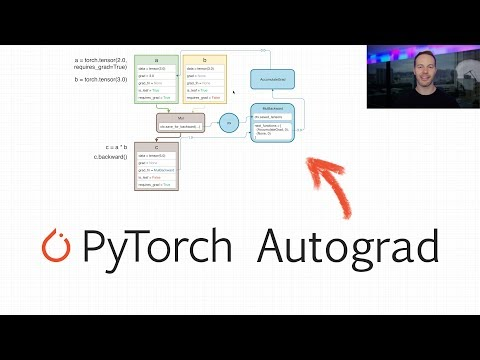

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('MswxJw-8PvE', width=600, height=400)